## Import Python Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
 df1 = sns.load_dataset('titanic')
 df1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


 Survived: This column indicates whether the passenger survived the Titanic disaster (1) or
 not (0)Pclass: This column represents the passenger's socio-economic status or class, where 1 =
 Upper class, 2 = Middle class, and 3 = Lower class.
 Name: This column contains the name of the passenger.
 Sex: This column specifies the gender of the passenger, either male or female.
 Age: This column denotes the age of the passenger. Missing values are denoted as NaN.
 SibSp: This column indicates the number of siblings or spouses the passenger had aboard
 the Titanic.
 Parch: This column indicates the number of parents or children the passenger had aboard
 the Titanic.
 Ticket: This column contains the ticket number of the passenger.
 Fare: This column represents the fare paid by the passenger.
 Embarked: This column indicates the port of embarkation for the passenger, with C =
 Cherbourg, Q = Queenstown, and S = Southampton.
 Age_group: This column appears to be a categorical grouping of ages, likely created for
 analysis purposes. Categories include "Adult", "Middle Age", "Seniors", etc

In [5]:
 # Basic Data Exploration
 print("\nBasic Information about Dataset:")
 print(df1.info())  # Overview of datase


Basic Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [6]:
 # Summary Statistics
 print("\nSummary Statistics:")
 print(df1.describe())  # Summary 


Summary Statistics:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [8]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df1.isnull().sum())  # Count of missing value


Missing Values in Each Column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [9]:

 df1.duplicated().sum()

np.int64(107)

In [10]:
 # Removing the Columns
 columns_remove = ['deck', 'embarked','alive', 'pclass']
 df = df1.drop(columns = columns_remove)

In [12]:
df['age'].fillna(round(df['age'].mean()), inplace=True)
df['embark_town'].mode()[0]
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

In [13]:
df.isnull().sum()

survived       0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

## Univariate Analysis

<Figure size 1200x800 with 0 Axes>

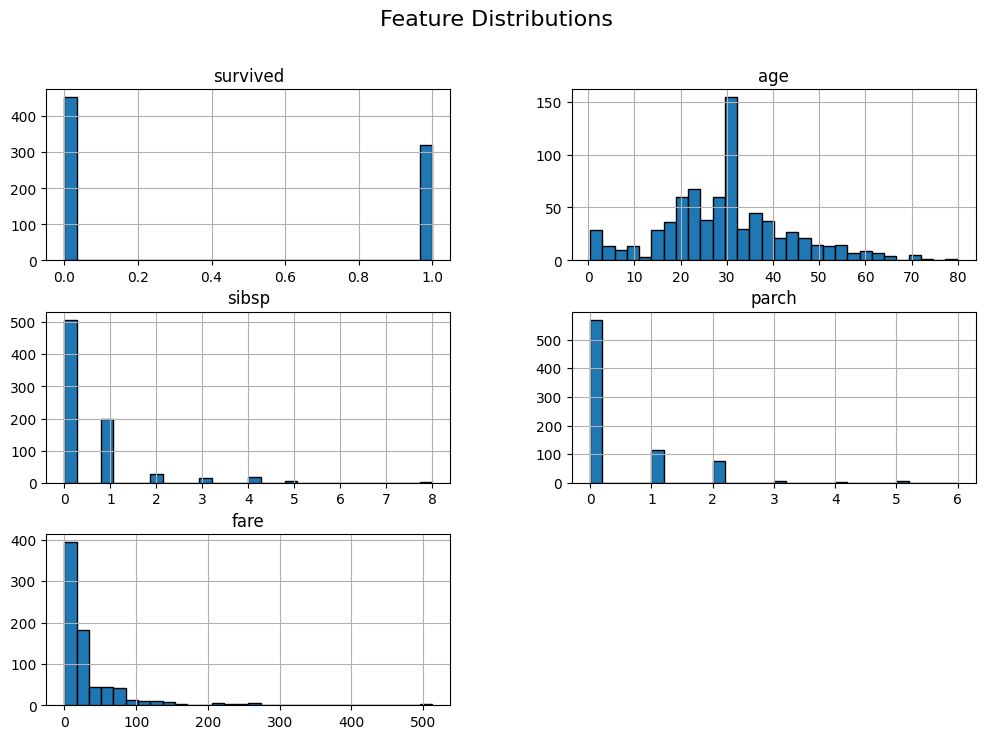

In [15]:
 # Histograms for distribution of features
 plt.figure(figsize=(12, 8))
 df.hist(figsize=(12, 8), bins=30, edgecolor='black')
 plt.suptitle("Feature Distributions", fontsize=16)
 plt.show()

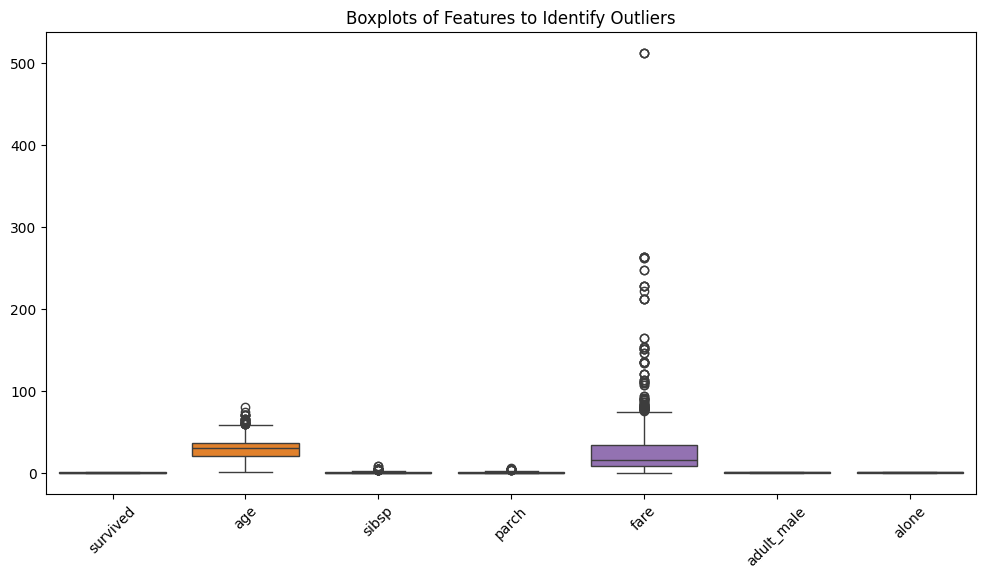

In [16]:
 # Boxplots for outlier detection
 plt.figure(figsize=(12, 6))
 sns.boxplot(data=df)
 plt.xticks(rotation=45)
 plt.title("Boxplots of Features to Identify Outliers")
 plt.show()

## Scatter Plot: Visualizing Relationships

In [18]:
 num_col = df.select_dtypes(include=[np.number]).columns.tolist()
 cat_col = df.select_dtypes(include=['object']).columns
 print(f"numerical_data: {num_col}")

numerical_data: ['survived', 'age', 'sibsp', 'parch', 'fare']


In [19]:
 # Scatter plot of two variables
 plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

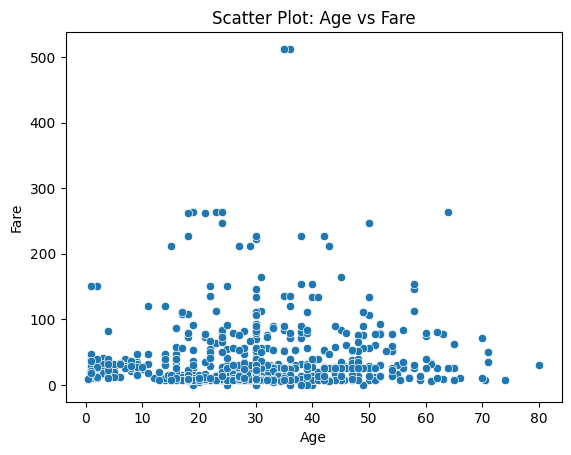

In [21]:
sns.scatterplot(x=df['age'], y=df['fare'])
plt.title("Scatter Plot: Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

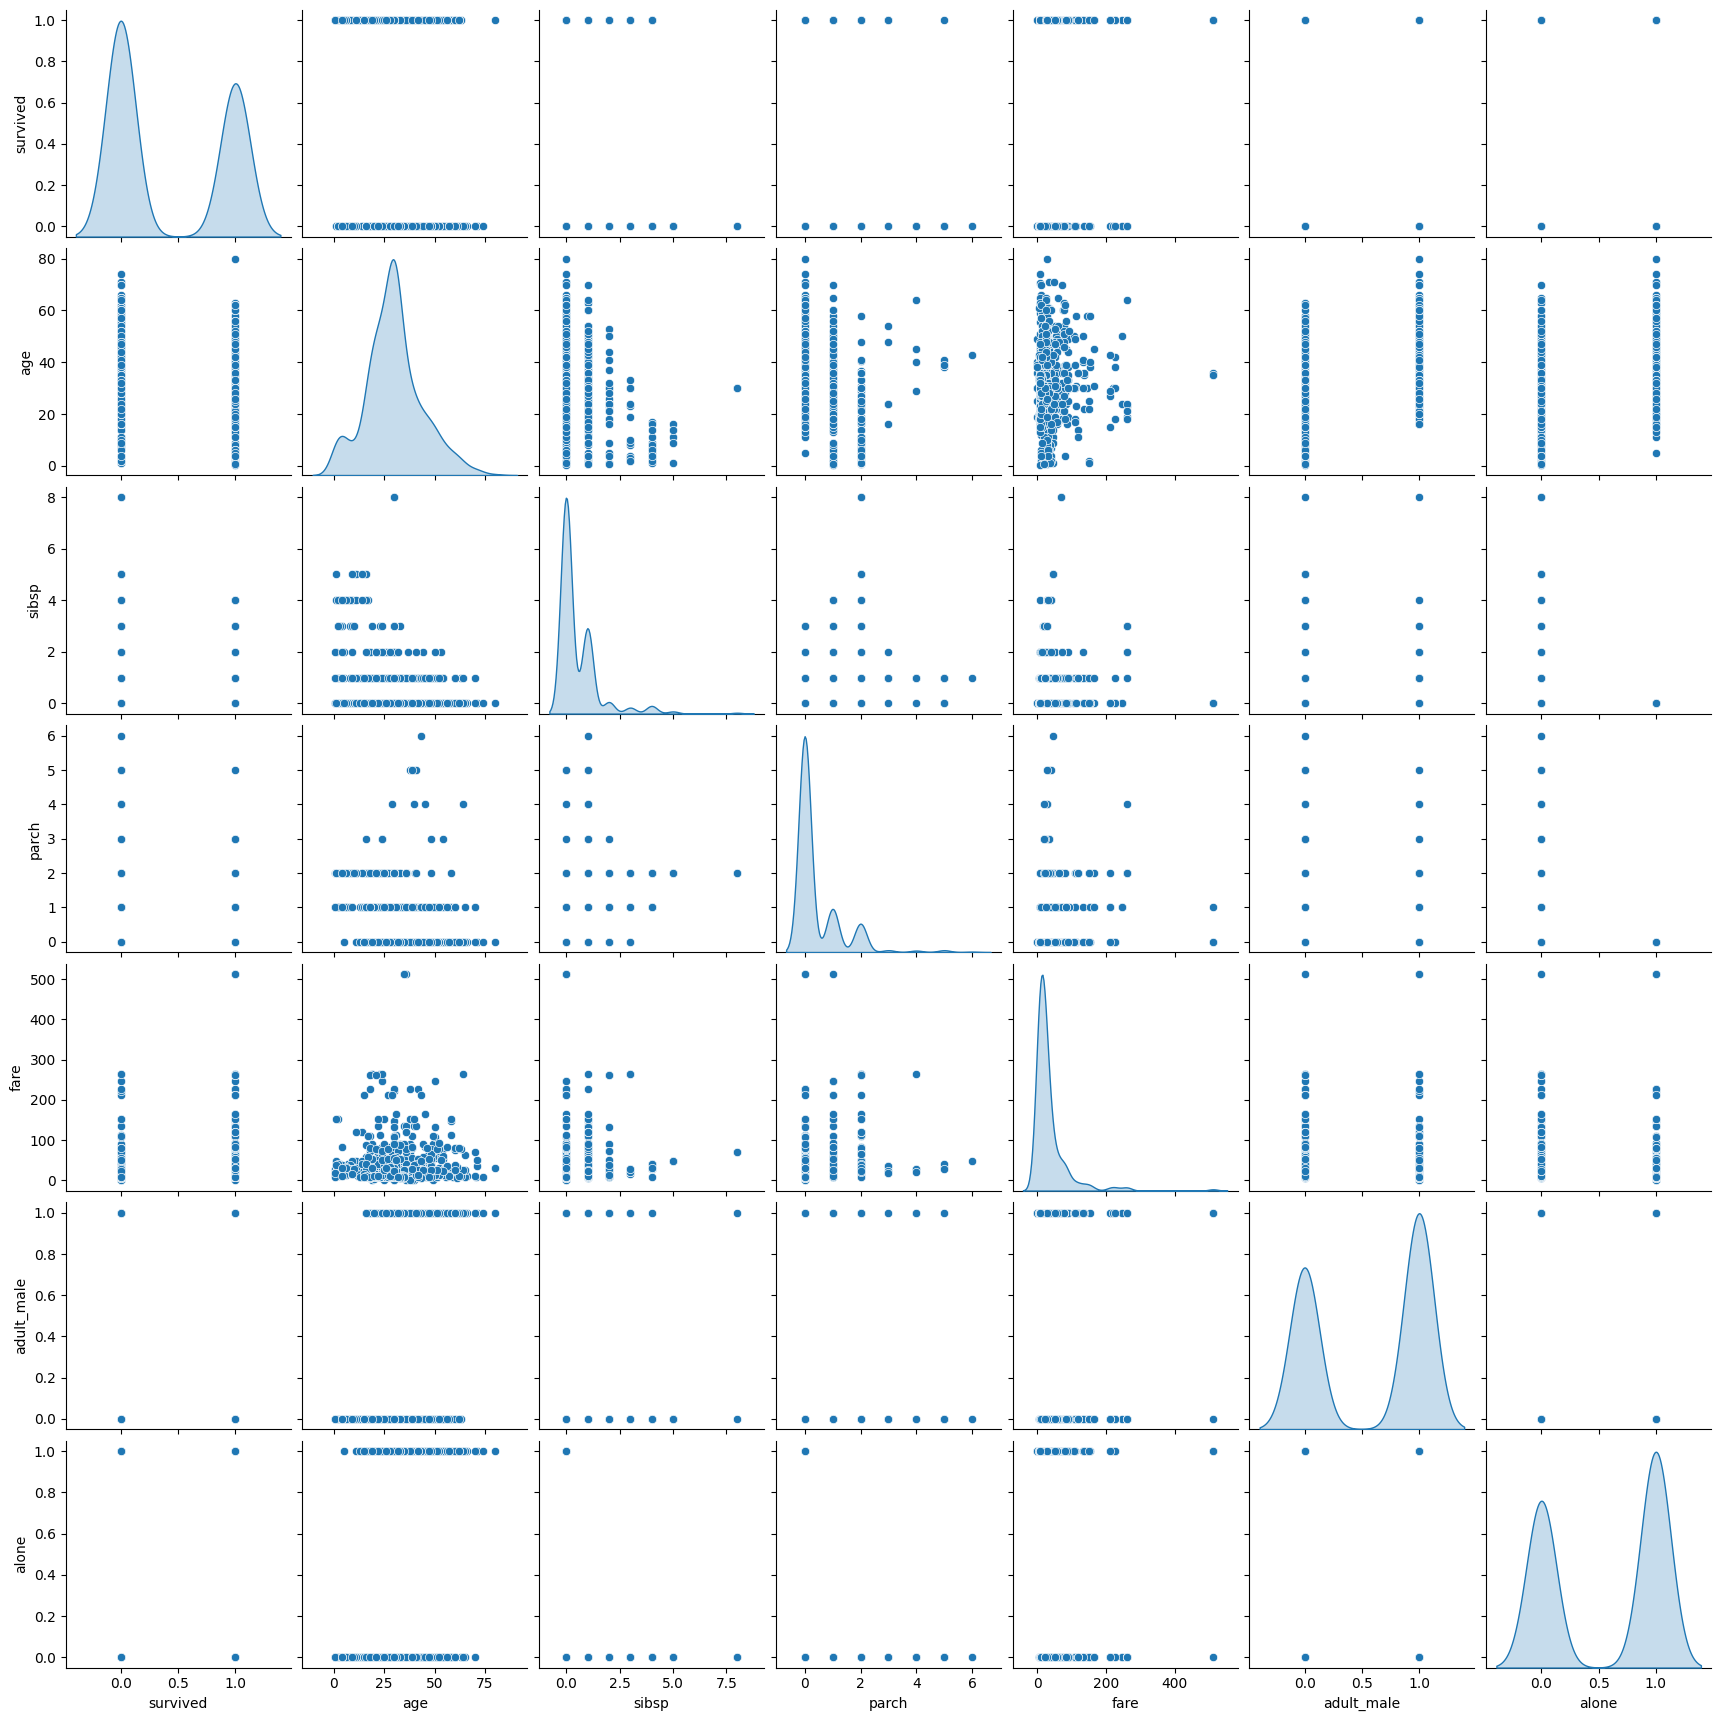

In [22]:
 # Pairplot to analyze feature relationships
 sns.pairplot(df, diag_kind='kde')
 plt.show()

## Pearson Correlation Coefficient

In [24]:
# Compute Pearson correlation coefficient
correlation = df[['age','fare']].corr('pearson')
print("Pearson Correlation Coefficient:\n", correlation)

Pearson Correlation Coefficient:
            age      fare
age   1.000000  0.090332
fare  0.090332  1.000000


## Covariance: Measuring Variability

In [26]:
# Compute covariance matrix
covariance = df[['age','fare']].cov()
print("Covariance Matrix:\n", covariance)

Covariance Matrix:
              age         fare
age   189.639876    65.236604
fare   65.236604  2750.244951


##  Heatmap: Visualizing 

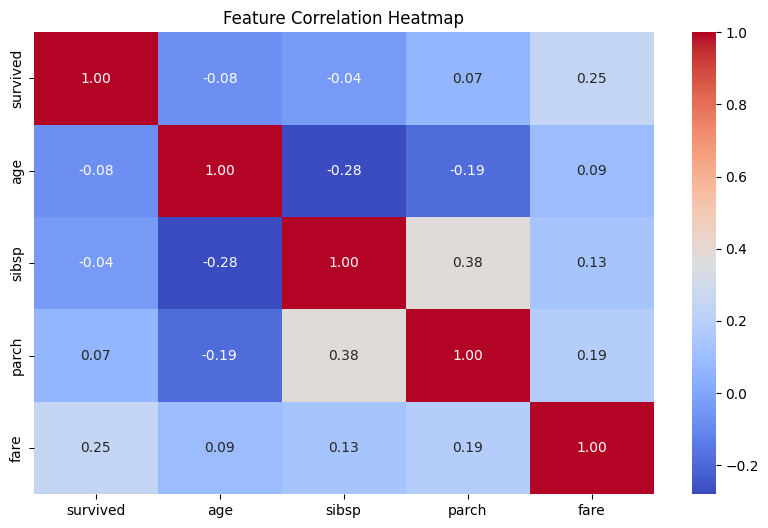

In [27]:
plt.figure(figsize=(10, 6))
corr_matrix = df[num_col].corr('pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()